<a href="https://colab.research.google.com/github/bybbaa/CHM/blob/main/%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

f(0.124) = 0.9031613104143023
f(0.432) = 0.7013510924487251


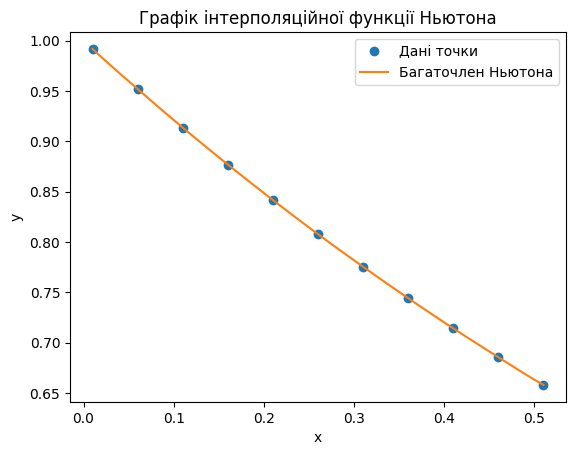

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array ([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51])
y = np.array([0.9918, 0.9519, 0.9136, 0.8769, 0.8416, 0.8077, 0.7753, 0.7441, 0.7141, 0.6854, 0.6579])

def first_interpolation(x, y, x0):
  n = len(x)
  f = np.zeros((n, n))
  f[:, 0] = y

  for j in range(1, n):
    for i in range(n - j):
      f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])

  ans = 0
  for j in range(n):
    prod = f[0, j]
    for i in range(j):
      prod *= (x0 - x[i])
    ans += prod
  return ans

def second_interpolation(x, y, x0):
  n = len(x)
  f = np.zeros((n, n))
  f[:, 0] = y
  for j in range(1, n):
    for i in range(n - j):
      f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])

  ans = f[0, 0]
  for j in range(1, n):
    prod = f[0, j]
    for i in range(j):
      prod *= (x0 - x[i])
    ans += prod
  return ans

x1 = 0.124
x2 = 0.432
y1 = first_interpolation(x, y, x1)
y2 = second_interpolation(x, y, x2)
print(f"f({x1}) = {y1}")
print(f"f({x2}) = {y2}")

xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)
for i in range(len(xx)):
  yy[i] = second_interpolation(x, y, xx[i])
plt.plot(x, y, 'o', label='Дані точки')
plt.plot(xx, yy, label='Багаточлен Ньютона')
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()